In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
def sample(n, variance):
    return np.random.normal(scale=np.sqrt(variance), size=n)


def get_ci_from_chi2(x, gamma=0.95):
    lambda_pos = scipy.stats.chi2(x.shape[0]).ppf((1 + gamma) / 2)
    lambda_neg = scipy.stats.chi2(x.shape[0]).ppf((1 - gamma) / 2)
    summa = np.sum(x ** 2)

    return summa / lambda_pos, summa / lambda_neg


def get_ci_from_norm(x, gamma=0.95):
    z_pos = scipy.stats.norm().ppf((3 + gamma) / 4)
    z_neg = scipy.stats.norm().ppf((3 - gamma) / 4)
    avg = np.mean(x) ** 2

    return x.shape[0] * avg / z_pos ** 2, x.shape[0] * avg / z_neg ** 2


def draw(data):
    plt.figure(figsize=(16, 8))
    x, y_1, y_2 = (
        [_ for _ in range(5, 1000)],
        [ci[0] for ci in data],
        [ci[1] for ci in data],
    )
    plt.title("Evaluation of variance")
    plt.plot(x, y_1, label="lower bound")
    plt.plot(x, y_2, label="upper bound")
    plt.legend()
    plt.xlabel("N")
    plt.ylabel("estimate variance value")
    plt.show()

In [3]:
variance = 1

chi2_bounds = []
norm_bounds = []
for i in range(5, 1000):
    x = sample(i, variance)

    lower_bound, upper_bound = get_ci_from_chi2(x)
    chi2_bounds.append((lower_bound, upper_bound))

    lower_bound, upper_bound = get_ci_from_norm(x)
    norm_bounds.append((lower_bound, upper_bound))

#### Посмотрим как изменяются границы доверительного интервала в зависимости от размера выборки для первой статистики:

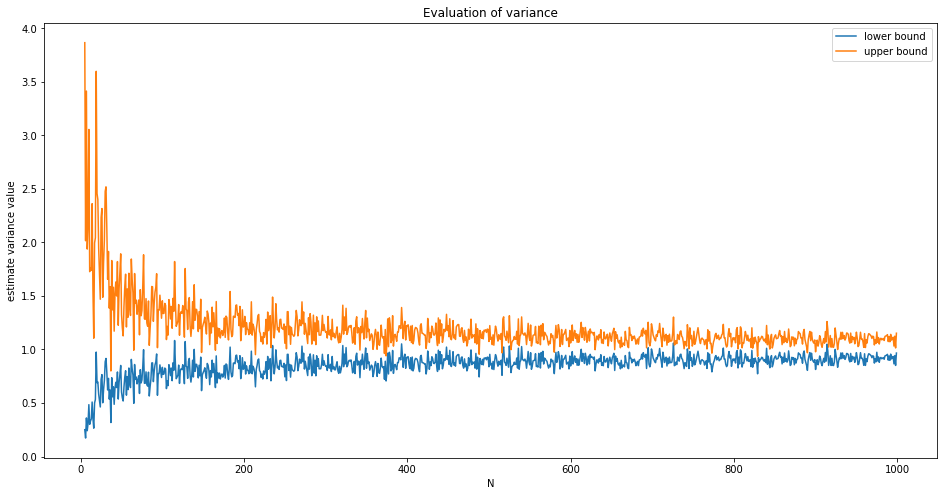

In [4]:
draw(chi2_bounds)

#### Видно, что доверительный интервал сужается, т.о. для достаточно большой выборки можно довольно точно оценить дисперсию распределения. 

#### Аналогичный эксперимент для доверительного интервала полученного с помощью второй статистики:

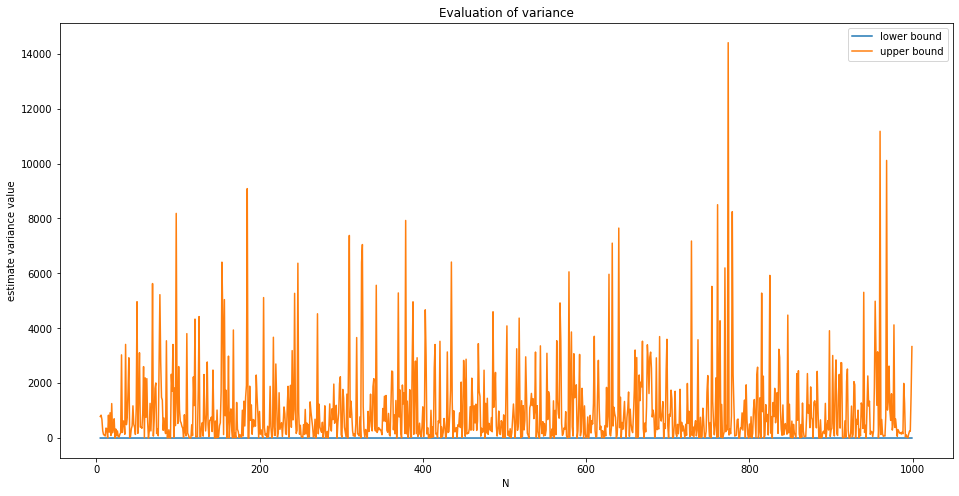

In [5]:
draw(norm_bounds)

#### В данном случае ширина интервала не имеет предела при сколь угодно большой выборке.